In [1]:
## 원래 비트를 조작하는 것은 하드웨어와 관련이 깊다.
## 1937년 클로드 섀넌은 전기 스위칭 회로를 연구하면서, 
## true, false 2개의 값으로 논리 연산을 설명하는 '부울 대수'(Boolean Algebra)를 회로에 적용했고
## '논리 게이트'(Logic Gate)를 만들어냈다.
## 이를 이용한 '논리 회로'(Logic Circuit)는 현대의 모든 디지털 컴퓨터의 기본 개념이자 근간을 이루고 있다.

# 부울 연산자

In [2]:
## 먼저, 가장 기본적인 '부울 연산'(Boolean Operation)부터 살펴보자.

In [3]:
True and False

False

In [4]:
True or False

True

In [5]:
not True

False

In [6]:
## AND, OR, NOT은 기본 부울 연산자로, 연산들을 서로 결합하거나 조합해 다른 보조 연산을 만들어 낼 수 있다.
## 대표적으로 XOR이 보조 연산에 해당하며, 기본 연산들이 조합으로 다음과 같이 XOR을 구성할 수 있다.

In [7]:
x = y = True

In [8]:
(x and not y) or (not x and y)

False

In [9]:
(x or y) and not (x and y)

False

In [10]:
## 그러나 XOR은 단순한 보조 연산을 뛰어 넘어 디지털 논리 게이트에서 매우 중요한 위치를 차지한다.

# 비트 연산자

In [11]:
## 이번에는 '비트 연산자'(Bitwise Operator)를 살펴보자

In [12]:
True & False

False

In [13]:
True | False

True

In [14]:
True ^ True

False

In [15]:
~True

-2

In [16]:
## 부울 연산자와 마찬가지로 비트 연산자도 동일하게 잘 동작한다.
## 그런데 비트 연산자 NOT(Bitwise NOT)인 ~(틸트)는 부울 변수에 적용하면 True는 1로 간주되어 -2가 된다.
## 비트 연산자 NOT은 2의 보수에서 1을 뺀 값과 같기 때문이다.
## 따라서 십진수로 표현할 때는 NOT x = -x - 1이 된다.

# 비트 조작 퀴즈

In [17]:
## 이제 '산술 연산'(Arithmetic Operation)을 비롯한 몇 가지 비트 연산을 다음과 같이 살펴보자

In [18]:
bin(0b0110 + 0b0010)

'0b1000'

      덧셈은 자릿수가 초과할 때 다음 자리로 넘겨주는 십진수의 덧셈과 동일하게 처리하면 된다.

In [19]:
bin(0b0011 * 0b0101)

'0b1111'

      곱셈도 십진수의 곱셈과 동일하다.

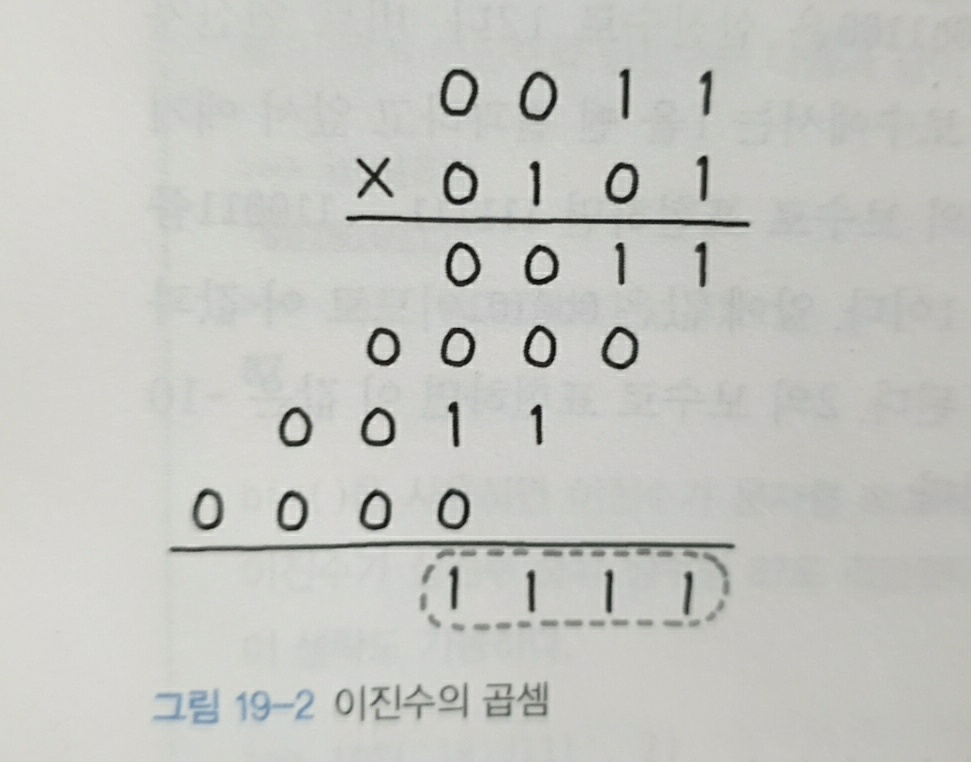

In [20]:
from IPython.display import Image

Image('그림19-2.jpg', width="250")

        이 그림에서 0011과 곱하는 0101에서 0은 무시하면 되고, 1은 기존 입력값 0011에 자릿수만큼 시프팅한 결과를 더하는 것과 같다
        즉, 첫 번째와 세 번째 자리가 1이므로, 첫 번째 결과는 0011, 세 번째 결과는 001100이다.
        다시 말해 0011+001100과 같으므로 001111이 된다.

In [21]:
bin(0b1101 >> 2)

'0b11'

        >>이 바로 시프팅이다. >>은 오른쪽으로 시프팅하는 연산이다.
        십진수로 치면 한 칸 시프팅에 값이 1/2이 된다.

In [22]:
bin(0b1101 << 2)

'0b110100'

        <<은 왼쪽으로 시프팅하는 연산이다. 십진수로 치면 한 칸 시프팅에 값이 2배가 된다.

In [23]:
bin(0b0101 ^ ~0b1100)

'-0b1010'

        이 경우는 조금 모호한 경우다.
        여기서 기대한 결과를 계산해보면 ~0b1100은 0b0011이 되고, 
        따라서 0b0101 ^ 0b0011 = 0b0110를 기대하고 있을 것이다. 십진수로는 6이다.
        그런데 결과는 -0b1010으로, 십진수로 -10이다. 전혀 다른 값이 됐다.
        왜 이렇게 됐을까?
        
        먼저 결과값이 달라진 이유를 먼저 살펴보자.
        0b1100은 십진수로 12다. 비트 연산자 NOT 결과는 십진수로 NOT x = -x - 1이므로 -13이 된다.
        -13을 2의 보수로 표현하면 111111...110011쯤 된다. 32비트 정수형이라면 앞에 28비트는 모두 1이다.
        0b0101과 XOR 연산을 한 결과는 111111...110110이 된다. 2의 보수로 표현하면 이 값은 -10이 된다.
        이 값은 컴퓨터가 계산한 결과와 동일하다.
        
        *** 헷갈리면 뒤에 '비트 연산자 NOT' 섹션에서 다시 다루므로 pass

#### - 자릿수 제한 비트 연산

In [24]:
## 이제 우리가 기대했던 결과대로 계산할 차례다. 
## 사실 우리가 기대했던 건 0b1100이 0b0011로 바뀌는 거였지만, 이렇게 하려면 별도의 부가 작업이 필요하다.
## 여기서는 자릿수 만큼의 최댓값을 지닌 비트 마스트 MASK를 반들고, 그 값과 XOR을 통해 값을 만들어 본다.

In [25]:
## 먼저 MASK 값인 0b1111과 XOR 결과는 다음과 같다.

In [26]:
bin(0b1100 ^ 0b1111)

'0b11'

In [27]:
## 그렇다면 다음과 같이 MASK와 XOR 결과를 처리하는 형태로 수정할 수 있겠다.

In [28]:
MASK = 0b1111
bin(0b0101 ^ (0b1100 ^ MASK))

'0b110'

In [29]:
## 이 계산 결과는 우리가 기대했던 6이다.
## 참고로 C++에서는 다음과 같이 자릿수를 제한하는 비트 연산을 통해 좀 더 우아하게 처리할 수 있다.
## 하지만 아쉽게도 파이썬은 이런 자료형을 별도로 제공하지 않는다.

```C++
int a = 0b1100;
std::cout << std::bitset<4>(~a);

----
0011
```

In [30]:
## **** 파이썬 ****

    ## 파이썬의 진법 표현
    
        ## 파이썬이 이진수, 십진수, 16진수를 저장하고 표현하는 방법을 살펴보자.
        ## 먼저 이진수와 십진수는 다음과 같이 각각 bin()과 int()를 사용해 서로 변환할 수 있다.

In [31]:
bin(87)

'0b1010111'

In [32]:
int('0b1010111', 2)

87

In [33]:
        ## 이진수임을 의미하는 접두사 0b는 다음과 같이 생략도 가능하다.
        ## 참고: 2진수 - 0b, 8진수 - 0o, 16진수 - 0x

In [34]:
int('1010111', 2)

87

In [35]:
        ## bin()을 사용해 변수에 값을 할당하면 문자형이 된다.

In [36]:
a = bin(87)
a

'0b1010111'

In [37]:
type(a)

str

In [38]:
        ## 만약 이진수를 문자열로 처리하지 않고 그대로 대입하면 십진수 숫자형이 된다.

In [39]:
b = 0b1010111
b

87

In [40]:
type(b)

int

In [41]:
        ## 이진수를 대입한 변수 b는 십진수 숫자 87이 되고, 더 이상 이진수로 처리되지 않는다.
        ## 심지어 십진수 87과 ID도 같다.

In [42]:
id(87), id(b)

(140732900721120, 140732900721120)

In [43]:
        ## 16진수는 bin() 대신 hex()로 변환할 수 있다.

# 2의 보수

In [44]:
## '2의 보수'(Two's Complement)를 모른다면 비트 조작을 제대로 하기가 어렵다.
## 특히 음수 처리가 헷갈리는 편인데 이 또한 원리만 제대로 이해한다면 전혀 어렵지 않다.

#### - 2의 보수 숫자 포맷

In [45]:
## 2의 보수는 컴퓨터가 음수를 저장하기 위해 일반적으로 취하는 여러 방법 중 하나다.
## 여기서는 편의를 위해, 4bit 레지스터 머신으로 가정하고 4bit로 숫자를 표현하는 예를 살펴본다.

## 먼저, 4bit로 표현 가능한 범위는 0000 ~ 1111로 총 16가지다. 
## 양수만 저장하면 0 ~ 15까지 16개를 그대로 저장하면 되지만 문제는 음수도 저장해야 한다는 점이다.
## 따라서 절반을 쪼개서 음수 몫으로 할당하고, 맨 앞 비트는 '부호 비트'(MSB, Most Significant Bit)로 사용한다.
## 양수의 경우 0xxx를 사용하고, 음수의 경우 1xxx를 사용한다.

```
0 - 0000
1 - 0001
2 - 0010
3 - 0011
4 - 0100
5 - 0101
6 - 0110
7 - 0111

-8 - 1000
-7 - 1001
-6 - 1010
-5 - 1011
-4 - 1100
-3 - 1101
-2 - 1110
-1 - 1111
```

In [46]:
## 정리한 값들을 한 줄로 늘인 다음, 원형으로 연결해서 그림 19-4와 같이 나타냈다.

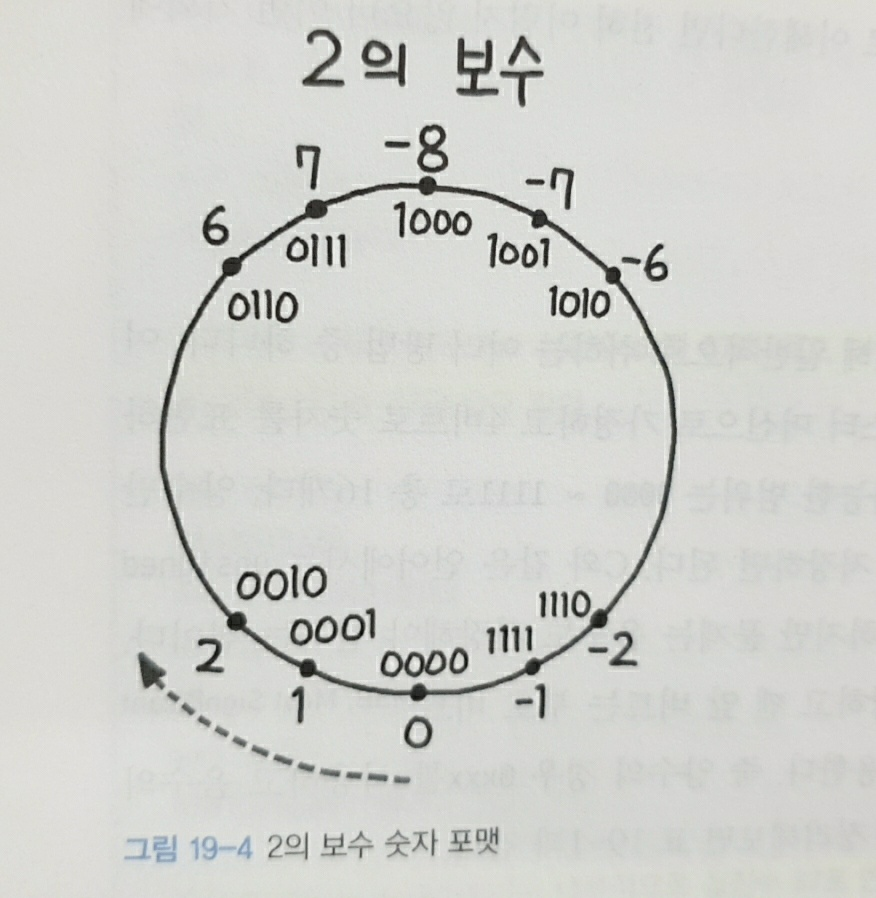

In [47]:
from IPython.display import Image

Image('그림19-4.jpg', width="250")

In [48]:
## 이것이 바로 2의 보수 숫자 포맷이고 숫자의 표현 범위는 -2^n-1에서 2^n-1 - 1까지가 된다.
## n은 비트 수이고 여기서 n = 4이므로 -8 에서 7까지가 된다.

## 그렇다면 이렇게 4비트로 2의 보수를 표현하려면 어떻게 해야 할까?
## 앞서 '자릿수 제한 비트 연산'에서 사용했던 방법을 활용하면 된다.
## 비트 마스크 MASK를 사용하는 방식이다.

In [49]:
MASK = 0xF # == 15 == 0b1111

In [50]:
bin(1), bin(1 & MASK)

('0b1', '0b1')

In [51]:
bin(7), bin(7 & MASK)

('0b111', '0b111')

In [52]:
bin(-8), bin(-8 & MASK)

('-0b1000', '0b1000')

In [53]:
bin(-7), bin(-7 & MASK)

('-0b111', '0b1001')

In [54]:
bin(-1), bin(-1 & MASK)

('-0b1', '0b1111')

In [55]:
## 이처럼 마스킹을 해주면 4bit로 2의 보수를 표현하는 것과 동일한 결과를 얻게 된다.

## 파이썬은 비트 연산이 필요할 때만 2의 보수로 변환하는 작업을 하고,
## 음수를 보여줄 때는 양의 정수를 표현하는 방식과 동일하게 하고, 앞에 부호만 덧붙여서 보여준다.

## 그러나 문제는 없다. 숫자를 4bit로 표현하든, 32bit로 표현하든, 비트 연산의 결과는 동일하다.

In [56]:
5 & -4

4

In [57]:
bin(0b0101 & 0b1100)

'0b100'

In [58]:
bin(0b00000000000000000000000000000101 & 0b11111111111111111111111111111100)

'0b100'

In [59]:
## 이처럼 몇 비트로 표현하든 간에, AND 연산을 한 십진수 결과는 모두 4로 동일하다.

In [60]:
## 다음은 OR 연산의 결과다.

In [61]:
5 | -4

-3

In [62]:
bin(0b0101 | 0b1100)

'0b1101'

In [63]:
bin(0b00000000000000000000000000000101 | 0b11111111111111111111111111111100)

'0b11111111111111111111111111111101'

#### - 2의 보수 수학 연산

In [64]:
## 눈치가 빠른 사람이라면 2의 보수를 얘기하면서 뭔가 용어가 혼재되어 있다는 느낌을 받았을 것이다.
## '2의 보수'라는 용어가 다소 모호함을 갖고 있기 때문이다.
## 즉 숫자 포맷으로 쓰일 때와 수학 연산자로 쓰일 때, 2의 보수는 서로 다른 의미를 지닌다.

In [65]:
## '2의 보수 수학 연산'이란 무엇을 의미하는 것일까?

## 2의 보수 수학 연산은 '가산 역 연산'(Additive Inverse Operation)이라 부를 수 있다.
## 양수를 음수로, 음수를 양수로 바꾸는 작업을 말한다.
## 방법은 비트 연산자 NOT을 한 후 1을 더하면 된다.

    1. '비트 연산자 NOT'은 2의 보수에서 1을 뺀 것이고,
    2. '2의 보수 수학 연산'은 비트 연산자 NOT에서 1을 더한 것이다.

In [66]:
## 즉 0111(7)의 2의 보수 연산은 1000(-8) + 1 = 1001(-7)이 된다.
## 1001(-7)의 비트 연산자 NOT은 0111(7) - 1 = 0110(6)이다.

## 2의 보수 연산은 정확히 양수를 음수로, 음수를 양수로 만들어준다.
## 둘을 더하면 당연히 0이 되고, 이진수로 계산할 경우 0111 + 1001 = 10000로 자릿수 오버플로가 발생하는데,
## 4bit 연산이므로 초과한 자릿수는 무시하며 따라서 0000, 즉 0이 된다.

#### - 비트 연산자 NOT

In [67]:
## 이제 비트 연산자 NOT을 다시 한번 살펴보자.
## ~ 연산자인 비트 연산자 NOT은 기준 비트 내에서 정확히 1을 0으로, 0을 1로 바꿔준다.
## 4bit라 가정할 때 0111은 1000이며 2의 보수 포맷에서는 0111은 7, 1000은 -8로 
## NOT x = -x - 1이 된다.

In [68]:
## 그렇다면 다시 한번 다음의 비트 연산을 살펴보자

In [69]:
bin(0b0101 ^ ~0b1100)

'-0b1010'

In [70]:
## 이 값이 0b0110이 아닌 이유는 여기서 입력값이 4bit 포맷이 아니라는 점 때문이다.
## 만약 4bit 머신이라면 0b1100이 음수 -4여야 하는데, 실제로는 이 값이 양수 12로 이므로 전제 조건에 문제가 있었다.
## 이 문제는 다음과 같이 8bit 포맷 또는 좀 더 큰 형태로 바꿔야 제대로 계산할 수 있다.

In [71]:
bin(0b00000101 ^ ~0b00001100)

'-0b1010'

In [72]:
## 8bit 포맷으로 바꿔서 적용해본 결과 동일하다.
## 이번에는 두 번째 값을 직접 먼저 계산한 결과를 두고 다시 계산해보자.

In [73]:
bin(0b00000101 ^ 0b11110011) # 두 번째 값에 ~ 대신 MASK와의 XOR 연산을 해줌

'0b11110110'

In [74]:
## 여기서는 두 번째 값을 2의 보수로 직접 만들어 NOT 연산자부터 먼저 계산해봤다.
## 결과는 1111 0011이고 이 값과 XOR한 최종 결과는 1111 0110이다. 
## 2의 보수이므로, 이 값은 -10이다. 
## 앞서 결과였던 -0b1010도 -10이므로 동일하다. 
## 8비트가 아니라 16비트 또는 그 이상이라도, 결과는 마찬가지로 다음과 같이 동일하다.

In [75]:
bin(0b0000000000000101 ^ ~0b0000000000001100)

'-0b1010'

# 요약

In [76]:
## bin(0b0101 ^ ~0b1100) 문제가 이해가 안 가고 헷갈려서 처음부터 정리해봄.

```python
bin(0b0101 ^ ~0b1100)

    여기서 우리는 NOT 연산으로 두 번째 값이 0b0011이 되어 최종 0b0110을 기대했음

    그러나 이는 4bit 머신일 경우에만 해당되는 이야기임

    결과는 -0b1010이 나옴

    바라는 결과가 나오려면 bin(0b0101 ^ (0b1100 ^ MASK))로 MASK = 0b1111 처리를 해줘야 4bit로 2의 보수 표현이 가능해짐

    MASK 처리를 했을 경우 두 번째 값의 NOT 연산 결과는 (0b1100 ^ MASK) = 3

    MASK 처리를 하지 않을 경우 -13이 나옴

```

# 70. 싱글 넘버

### LeetCode 136. Single Number

##### 딱 하나를 제외하고 모든 엘리먼트는 2개씩 있다. 1개인 엘리먼트를 찾아라.

In [77]:
## 예제 1
    ## input: [2, 2, 1]
    ## output: 1
    
## 예제 2
    ## input: [4, 1, 2, 1, 2 ]
    ## output: 4

##### 풀이 1 XOR 풀이

In [78]:
## 단 1개의 엘리먼트를 찾는 데 적당한 연산자가 있다.
## 배타적(Exclusive) OR, 즉 XOR이다.
## XOR은 입력값이 서로 다르면 True, 서로 동일한 경우 False가 되는 논리 게이트 연산자다.
## 이를 십진수에 적용해보면 다음과 같다.

In [79]:
0 ^ 0

0

In [80]:
4 ^ 0

4

In [81]:
4 ^ 4

0

In [82]:
## 두 번 등장한 엘리먼트는 0으로 초기화되고, 한 번만 등장하는 엘리먼트는 그 값을 온전히 보존한다.
## 즉 배열의 모든 값을 XOR 하면, 단 한 번만 등장하는 엘리먼트만 그 값이 남게 된다.
## XOR 연산은 같은 값을 두 번 연산하면 원래의 값으로 돌아오는 성질을 가지고 있다.

In [83]:
from typing import *

def singleNumber(nums: List[int]) -> int:
    result = 0
    for num in nums:
        result ^= num
    
    return result

In [84]:
nums = [1, 2, 1, 2, 4]

singleNumber(nums)

4

# 71. 해밍 거리

### LeetCode 461. Hamming Distance

##### 두 정수를 입력받아 몇 비트가 다른지 계산하라.

In [85]:
## 예제 1
    ## input: x = 1, y = 4
    ## output: 2

    - 설명
        1   (0 0 0 1)
        4   (0 1 0 0)
               ^   ^
               
        표시한 두 군데 비트가 다르므로 정답은 2다.

##### 풀이 1 XOR 풀이

In [86]:
## 자연어 처리에서도 널리 쓰이는 '해밍 거리'(Hamming Distance)는 두 정수 또는 두 문자열의 차이를 말한다.
## "karolin"과 "kathrin"의 차이는 3이고, 1011101과 1001001의 차이는 2다.
## 그렇다면 두 이진수의 다른 값을 가진 위치 수는 어떻게 계산하면 될까?
## 이전 문제와 같이 XOR 연산을 하면 다른 값을 가진 위치는 1이 될 것이다.

In [87]:
def hammingDistance(x: int, y: int) -> int:
    return bin(x ^ y).count('1')

In [88]:
hammingDistance(1, 4)

2

# 72. 두 정수의 합

### LeetCode 371. Sum of Two Integers

##### 두 정수 a와 b의 합을 구하라. + 또는 - 연산자는 사용할 수 없다.

In [89]:
## 예제 1
    ## input: a = 1, b = 2
    ## output: 3
    
## 예제 2
    ## input: a = -2, b = 3
    ## output: 1

##### 풀이 1 전가산기 구현

In [90]:
## 두 정수의 합을 구하는 데 덧셈이나 뺄셈을 사용할 수 없기 때문에, 비트 연산만으로 풀이해야 하는 문제다.

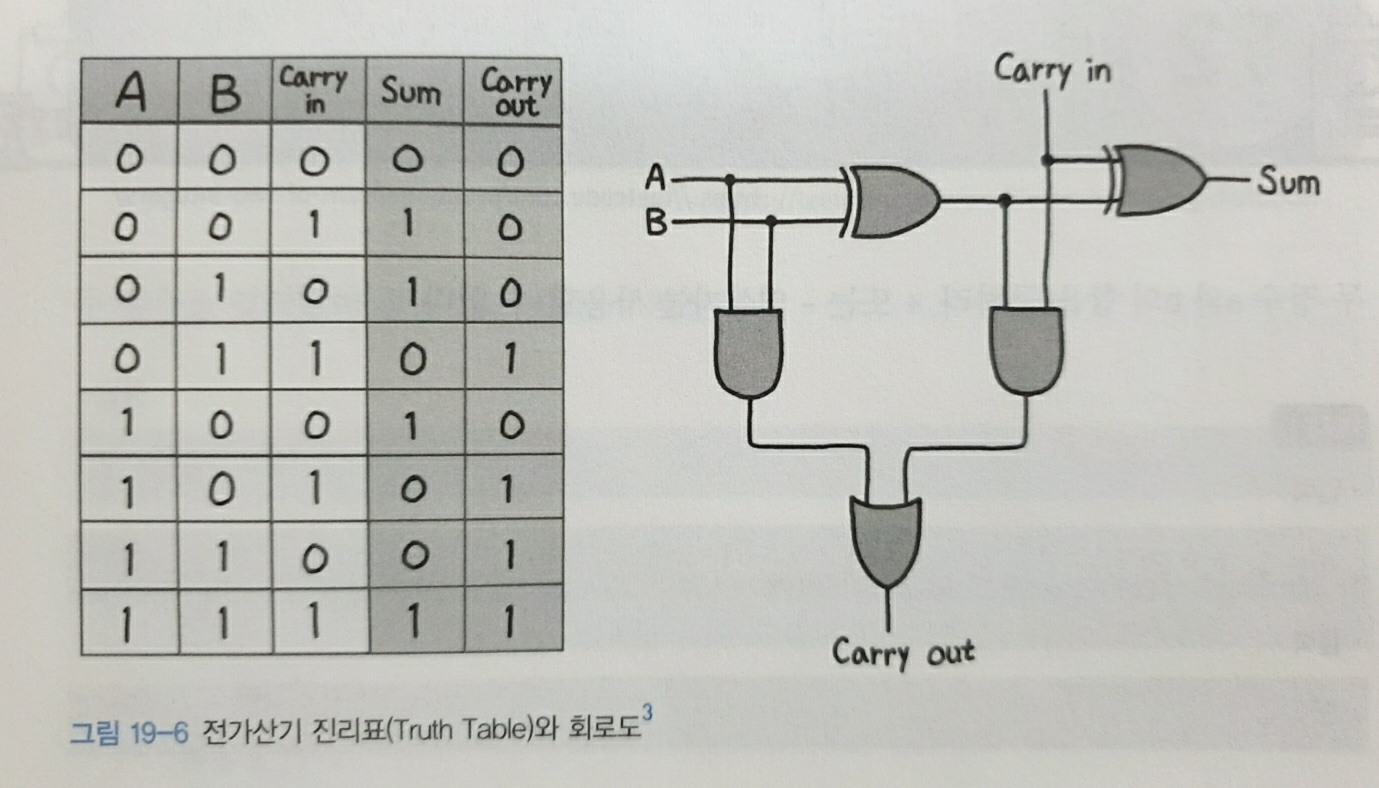

In [91]:
from IPython.display import Image

Image('그림19-6.jpg', width="500")

In [92]:
## 그림 19-6의 우측 전가산기 회로도는 AND 게이트 2개, XOR 게이트 2개, OR 게이트 1개로 이뤄져 있다.
## 이 그림에서 각 게이트 위치에 중간값을 Q1, Q2, Q3로 파란색 글씨로 그림 19-7과 같이 마킹해본다.

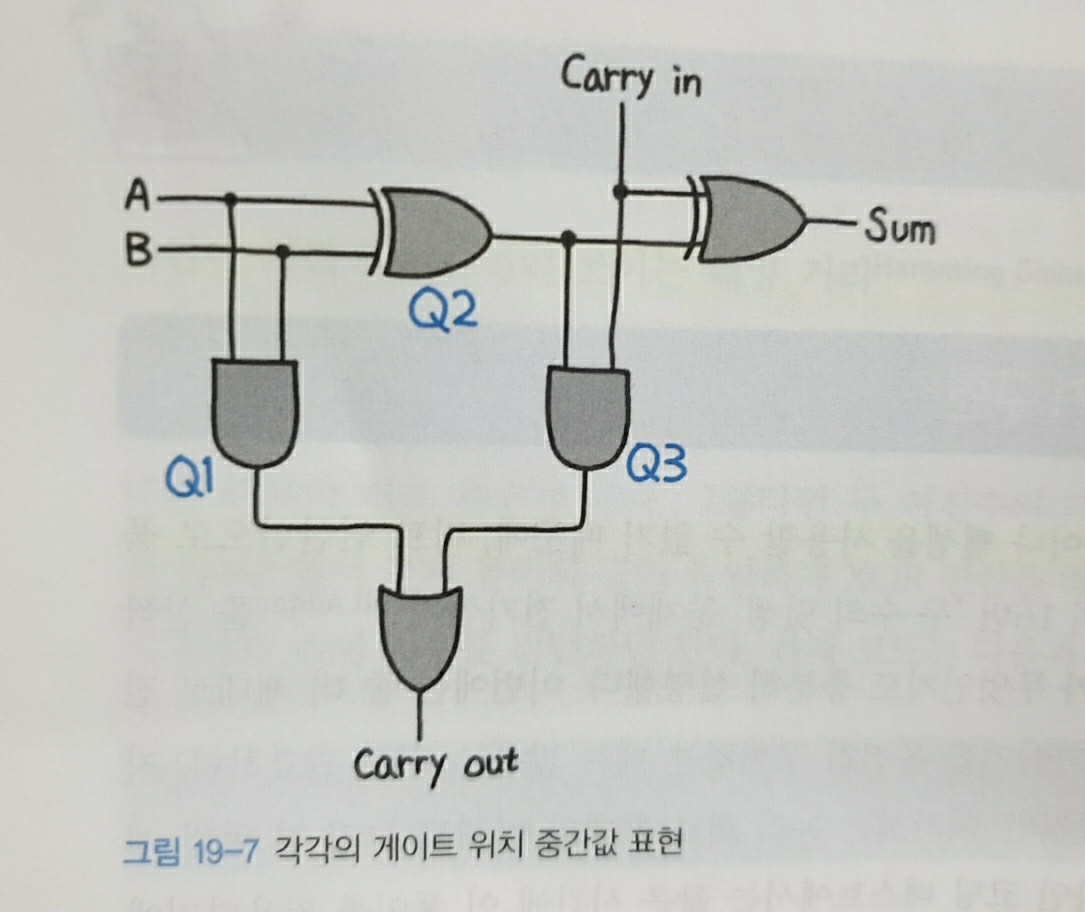

In [93]:
from IPython.display import Image

Image('그림19-7.jpg', width="300")

In [94]:
## 이 그림의 중간값 변수에 회로도의 연산을 통해 직접 계산해보자.
## 이를 파이썬 코드로 구현해보면 다음과 같다.

```python 
Q1 = A & B
Q2 = A ^ B
Q3 = Q2 & carry
Sum = carry ^ Q2
carry = Q1 | Q3
```

In [95]:
## 각각의 비트는 이렇게 전가산기를 통해 sum을 구하는 로직으로 처리할 수 있게 됐다.
## 다음으로 이를 위한 전처리를 진행해보자

```python
MASK = 0xFFFFFFFF
a_bin = bin(a & MASK)[2:].zfill(32)
```

In [96]:
## a 정수를 a_bin이라는 이진수로 변경하는 데 몇 가지 전처리 작업을 진행했다.
## 먼저, bin() 함수는 십진수를 이진수로 변환하면 0b 식별자가 항상 붙는다.
## 이는 필요없는 값이므로, 슬라이싱 bin(a)[2:]로 떼어낸다.
## 다음으로 a & MASK는 음수 처리를 위해 2의 보수로 만들어주는 역할을 한다.
## 앞에서 ob1100 ^ MASK는 4bit로 2의 보수 표현한 후 NOT 연산까지 하기 위해 XOR(^) 연산을 했으나
## 이번에는 그냥 2의 보수로 변경하면 되므로 AND(&) 연산을 해주면 된다.
## 입력값을 32bit 정수로 가정했으므로 MASK는 0xFFFFFFFF로 했고, 이 값을 AND 연산하면 2의 보수가 된다. 

In [97]:
MASK = 0xFFFFFFFF
bin(1 & MASK)

'0b1'

In [98]:
bin(-1 & MASK)

'0b11111111111111111111111111111111'

In [99]:
## 양수인 경우 마스킹을 해도 동일하지만 음수인 -1은 2의 보수에서 가장 큰 값이기 때문에, 
## 이처럼 마스킹을 할 경우 32bit 전체가 1로 꽉 채워지는 모습을 확인할 수 있다.

## 다음으로 zfill(32)로 32비트 자릿수를 맞춰준다. 
## 앞자리가 비어 있으면 계산을 하기 어렵기 때문에 모두 0으로 해서 32비트 자릿수를 채워준다.

In [100]:
'1'.zfill(32)

'00000000000000000000000000000001'

In [101]:
## 여기까지가 전처리고, 이렇게 처리한 값을 낮은 자릿수부터 하나씩 전가산기를 통과하면서 결과를 채워나가면 된다.
## 32비트이므로 다음과 같이 32번 반복한다.

```python
for i in range(32):
    A = int(a_bin[31 - i])
    B = int(b_bin[31 - i])
    
    Q1 = A & B
    Q2 = A ^ B
    Q3 = Q2 & carry
    Sum = carry ^ Q2
    carry = Q1 | Q3
    
    result.append(str(Sum))

if carry == 1:
    result.append('1')
```

In [102]:
## 마지막 반복이 끝난 후 아직 carry 값이 남아 있다면 자릿수가 하나 더 올라간 것이므로, 1을 추가한다.
## 이렇게 되면 최대 33비트가 되겠지만, 다음과 같이 마지막 마스킹 작업을 통해 이 값은 날아가게 될 것이다.

```python
result = int(''.join(result[::-1], 2) & MASK
```

In [103]:
## result는 낮은 자릿수부터 채웠으므로, 뒤집은 다음 십진수 정수로 바꿔준다.
## 그러고 나서 다음과 같이 마스킹을 해서, 만약 자릿수를 초과했다면 그 값은 제거될 수 있게 한다.

In [104]:
int('0b100000000000000000000000000000001', 2) & MASK

1

In [105]:
## 좀 더 쉬운 예

int('0b10101', 2) & 0b1111

5

In [106]:
bin(5)

'0b101'

In [107]:
## 4bit MASK로 마스킹하면 젤 앞의 1이 잘려나가고 0b0101이 된다.

In [108]:
## 마지막으로 음수를 처리할 차례다. 
## 2의 보수에서 음수는 32번째 비트의 값이 1인 경우다.
## 양의 정수 최댓값은 0x7FFFFFFF이므로 만약 32번째 비트가 1이라면 이보다 큰 값이 되고
## 이 경우 마스킹 값과 XOR을 한 다음 NOT 처리를 해서 다시 음수로 만들어 준다.

```python
INT_MAX = 0x7FFFFFFF
...
if result > INT_MAX:
    result = ~(result ^ MASK)
```

In [109]:
## for example...

result = -1050

if result > 0x7FFFFFFF:
    result = ~(result ^ 0xFFFFFFFF)

In [110]:
result

-1050

In [111]:
## 전체 코드는 다음과 같다.

In [112]:
def getSum(a: int, b: int) -> int:
    MASK = 0xFFFFFFFF
    INT_MAX = 0x7FFFFFFF
    
    a_bin = bin(a & MASK)[2:].zfill(32)
    b_bin = bin(b & MASK)[2:].zfill(32)
    
    result = []
    carry = 0
    Sum = 0
    
    for i in range(32):
        A = int(a_bin[31 - i])
        B = int(b_bin[31 - i])
        
        # 전가산기 구현
        Q1 = A & B
        Q2 = A ^ B
        Q3 = Q2 & carry
        Sum = carry ^ Q2
        carry = Q1 | Q3

        result.append(str(Sum))

    if carry == 1:
        result.append('1')
        
    # 초과 자릿수 처리
    result = int(''.join(result[::-1]), 2) & MASK
    
    # 음수 처리
    if result > INT_MAX:
        result = ~(result ^ MASK)
        
    return result

In [113]:
getSum(1, 2)

3

In [114]:
## 전가산기를 구현해 문제를 풀이해봤다.
## 논리 회로를 직접 구현해보니, 재미는 있지만(??) 풀이가 지나치게 어렵다. 
## 이번에는 좀 더 쉬우면서도 실용적인 풀이를 살펴보자

##### 풀이 2 좀 더 간소한 구현

In [115]:
## 여기서는 핵심만 살려 간단하게 동작 가능하게 해본다.

```python 
a, b = (a ^ b) & MASK, ((a & b) << 1) & MASK
```

In [116]:
## 여기서 MASK는 2의 보수로 만들기 위한 것이다.
## 여기서는 a와 b의 역할을 구분해 a에는 carry 값을 고려하지 않는 a와 b의 합이 담기게 했고,
## b에는 자릿수를 올려가며 carry 값이 담기게 했다.

In [117]:
def getSum(a: int, b: int) -> int:
    MASK = 0xFFFFFFFF
    INT_MAX = 0x7FFFFFFF
    
    # 합, 자릿수 처리
    while b != 0:
        a, b = (a ^ b) & MASK, ((a & b) << 1) & MASK
        
    # 음수 처리
    if a > INT_MAX:
        a = ~(a ^ MASK)
    
    return a

In [118]:
getSum(1, 2)

3

In [119]:
getSum(-1, -2)

-3

# 73. UTF-8 검증

### LeetCode 393. UTF-8 Validation

##### 입력값이 UTF-8 문자열이 맞는지 검증하라.

```
- <예제 1>
    data = [197, 130, 1], 이 값은 11000101 10000010 00000001로 표현되며,
    2바이트 문자 다음에 오는 1바이트 문자로, 모두 2개며 정상이다.
    
   
- <예제 2>
    data = [235, 140, 4], 이 값은 11101011 10001100 00000100로 표현되며, 
    첫 바이트의 첫 3비트가 모두 1이고 4번째 비트가 0이므로 3바이트 문자임을 뜻한다.
    다음 바이트도 10으로 시작하여 정상이지만, 그 다음 바이트는 10으로 시작하지 않으므로 비정상이다.
```

##### 풀이 1 첫 바이트를 기준으로 한 판별

In [120]:
## 앞서 6장에서 다뤘던 UTF-8를 구현해보고, 실제로 주어진 정수형 배열이 UTF-8 문자열이 맞는지를 검증하는 문제다.
## 이 문제는 UTF-8의 실제 조건을 그대로 묻는 문제이기 때문에 실용적이며, 따라서 여기서의 풀이는 실무에서도 
## 얼마든지 활용할 수 있는 좋은 묹다.
## 문제 풀이에 핵심적인 부분인 인코딩 구조를 정리한 표 19-2를 보자.

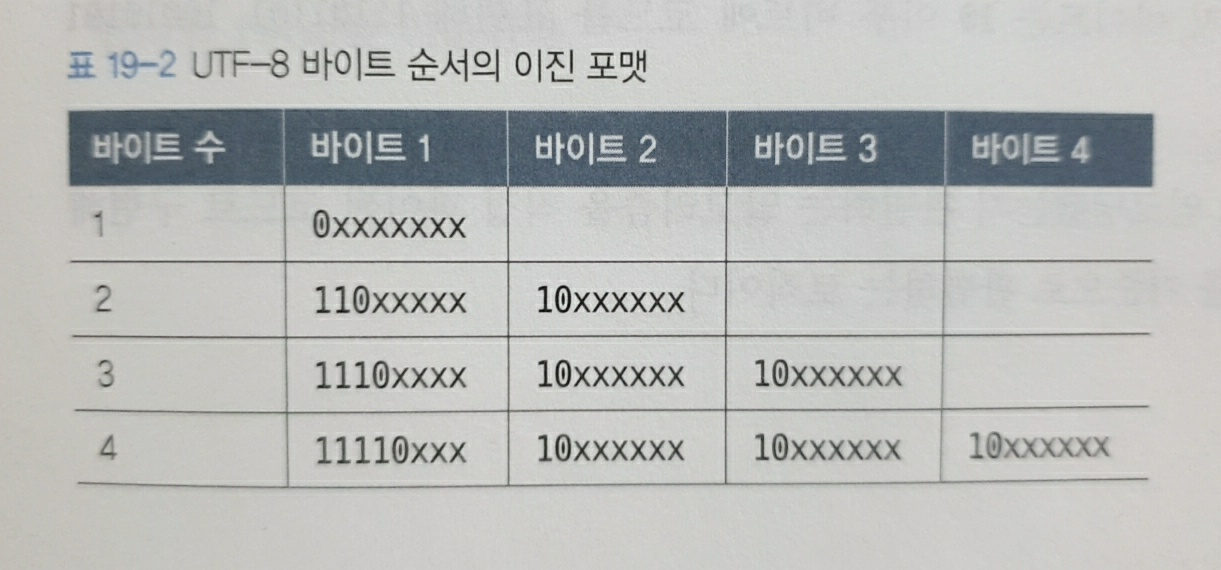

In [121]:
from IPython.display import Image

Image('표19-2.jpg', width="500")

In [122]:
## 표를 기준으로 첫 바이트가 1110으로 시작하면 3바이트 문자이므로, 
## 첫 바이트를 제외하고 뒤따르는 2바이트는 모두 10으로 시작해야 유효한 UTF-8 문자가 된다.

In [123]:
## 유니코드 문자의 UTF-8 인코딩은 그림 19-8과 같이 처리된다.

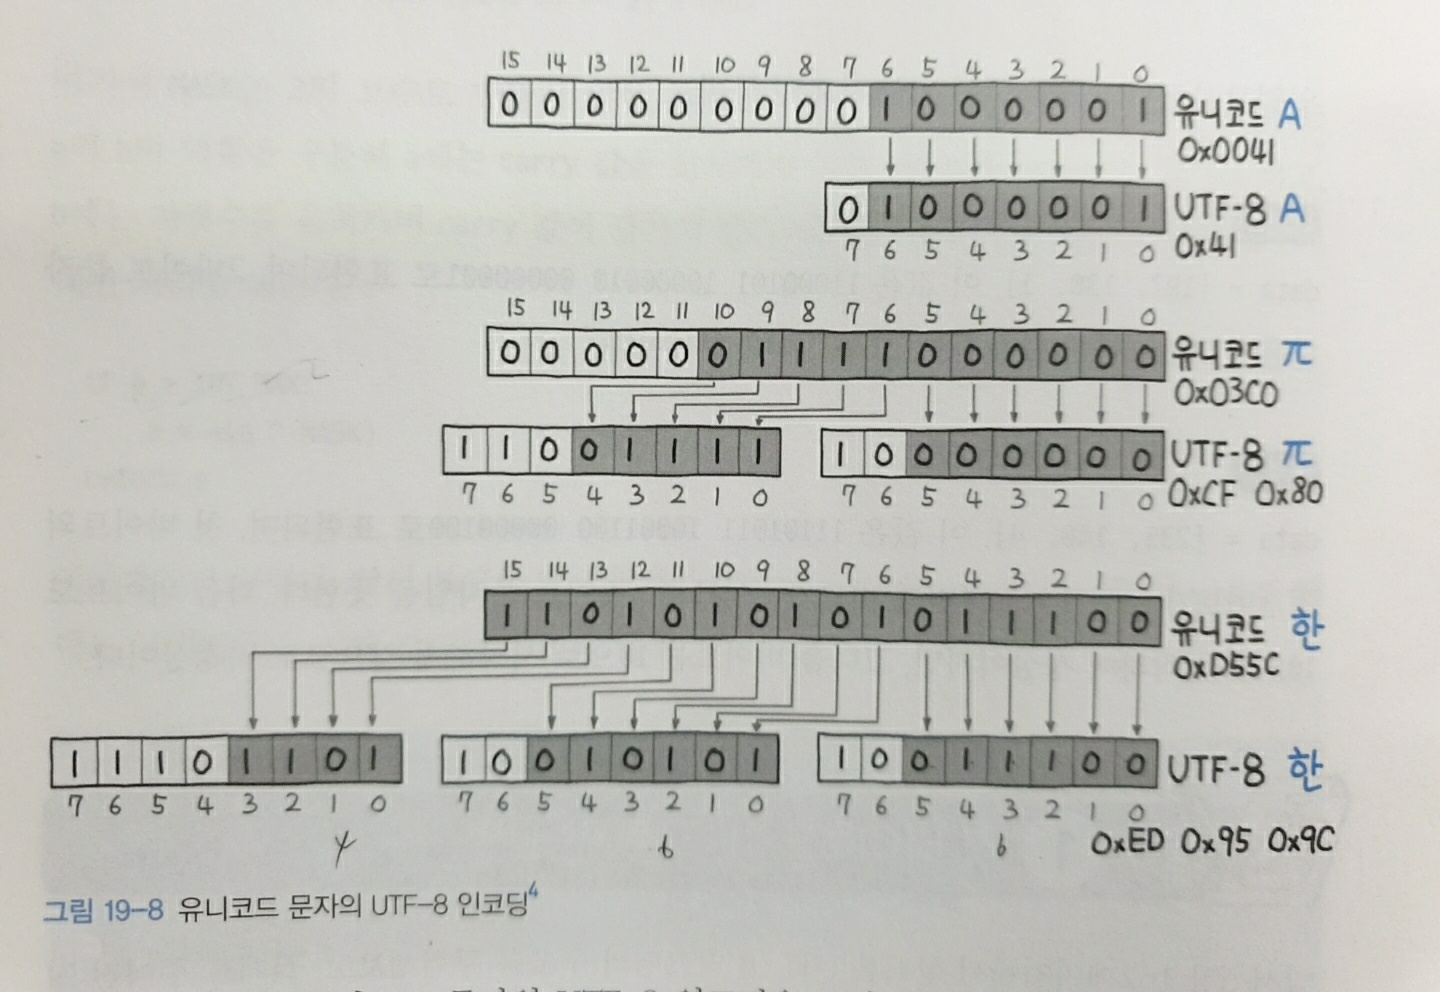

In [124]:
from IPython.display import Image

Image('그림19-8.jpg', width="500")

In [125]:
## 예를 들어 문자 '한'은 유니코드로 1101010101011100이다.
## 총 16bit 이므로 UTF-8 인코딩으로는 3바이트로 표현할 수 있다.
## 따라서 첫 바이트는 1110 이후 비트에 코드를 표현할 수 있으며,
## 나머지 바이트는 10 이후 비트에 코드를 표현할 수 있다.

In [126]:
## 이제 정상적으로 인코딩됐는지 판별하는 알고리즘을 구현해보자.

In [127]:
def validUtf8(data: List[int]) -> bool:
    # 문자 바이트 만큼 10으로 시작 판별
    def check(size):
        for i in range(start + 1, start + size + 1):
            if i >= len(data) or (data[i] >> 6) != 0b10:
                return False
            return True
    
    start = 0
    
    while start < len(data):
        # 첫 바이트 기준 총 문자 바이트 판별
        first = data[start]
        
        if (first >> 3) == 0b11110 and check(3):
            start += 4
        elif (first >> 4) == 0b1110 and check(2):
            start += 3
        elif (first >> 5) == 0b110 and check(1):
            start += 2
        elif (first >> 7) == 0:
            start += 1
        else:
            return False
        
    return True

In [128]:
data = [197, 130, 1]

validUtf8(data)

True

In [129]:
## 실제로 UTF-8 인코딩의 유효성을 검증할 수 있는 코드로, 단순히 문제 풀이를 넘어 실무에서도 활용 가능한 유용한 코드다.

# 74. 1비트의 개수

### LeetCode 191. Number of 1Bits

##### 부호없는 정수형(Unsigned Integer)을 입력받아 1비트의 개수를 출력하라

In [130]:
## 예제 1
    ## input: 00000000000000000000000000001011
    ## output: 3
    
## 예제 2
    ## input: 00000000000000000000000010000000
    ## output: 1

##### 풀이 1 1의 개수 계산

In [131]:
## 이 문제의 결과는 모두 0으로 구성된 비트들과의 '해밍 거리'(Hamming Distance)로,
## 이를 '해밍 가중치'(Hamming Weight)라고 부른다.
## 따라서 이 문제의 정답은 해밍 가중치의 값이라고 할 수 있다.

In [132]:
## 해밍 거리는 A XOR B이었고, 그렇다면 해밍 가중치는 B를 0으로 두면 된다.

In [133]:
def hammingWeight(n: int) -> int:
    return bin(n ^ 0b00000000000000000000000000000000).count('1')

In [134]:
## 0을 길이만큼이나 입력하려니 쉽지 않다.
## 이는 사실 파이썬이 자동으로 처리해주기 때문에 0을 하나만 둬도 충분하다.

In [135]:
def hammingWeight(n: int) -> int:
    return bin(n ^ 0).count('1')

In [136]:
## 또한 B는 0이므로 XOR은 생략이 가능하다. 

In [137]:
def hammingWeight(n: int) -> int:
    return bin(n).count('1')

##### 풀이 2 비트 연산

In [138]:
bin(0b1011 & 0b1010)

'0b1010'

In [139]:
bin(0b1010 & 0b1001)

'0b1000'

In [140]:
bin(0b1000 & 0b0111)

'0b0'

In [141]:
## 결과들의 공통점을 보면 어떤 값과 그 값에서 1을 뺀 값을 AND 연산하면 1의 개수가 하나 줄어든다.
## 이런 특징을 이용해 0이 될때까지 작업을 반복하면 전체 비트에서 1의 개수가 몇 개인지 알 수 있다.

In [142]:
def hammingWeight(n: int) -> int:
    count = 0
    while n:
        n &= n - 1
        count += 1
    return count

In [143]:
## n이 0이 될 때까지 반복하고, 그 횟수를 리턴하면 그 값이 바로 1의 개수가 된다.

In [144]:
n = 0b00000000000000000000000000001011

hammingWeight(n)

3

In [145]:
## **** 참고 ****

    ## XOR을 이용한 변수 스왑
        
        ## >>> x, y = 9, 4
        ## >>> x = x + y       // 13
        ## >>> y = x - y      // 9
        ## >>> x = x - y      // 4
        ## >>> x, y
        ## (4, 9)
        
        ## 이와 유사하게 비트 조작으로도 임시 변수 없이 스왑이 가능하다.
        
        ## >>> x, y = 9, 4    // 1001, 0100
        ## >>> x = x^y        // 1001^0100 = 1101(13)
        ## >>> y = x^y        // 1101^0100 = 1001(9)
        ## >>> x = x^y        // 1101^1001 = 0100(4)
        ## >>> x, y
        ## (4, 9)
        
        ## 덧셈, 뺄셈을 이용한 방법과 다르지 않다.